# Assignment Eight
---
Oisín Morrison - 22/01/20 - Hw8.ipynb

---

This assignment is in relation to the use of Fourier Transforms in signal analysis. 

Note: we are given some examples to follow, so I will follow them in such cases i.e. I will not add extra labelling, commenting or titles to plots where we are given example code that does not have that. This means that plot sizes etc. may also be different since I tend to increase the figsize for my own plots to make them easier to see.

In [1]:
#standard imports for data science with python
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import scipy
import sklearn

pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## Task 1
This task just involves creating a signal and needs not be further clarified.

(0, 0.00125)

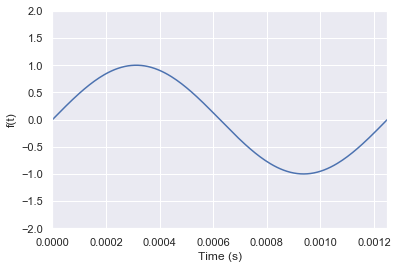

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fsig = 800 #Define a frequency for a sine wave; this is the SIGNAL.
Tsig = 1/fsig #Tsig is the period of the SIGNAL
t=np.linspace(0,Tsig*5,1000); #Set up array with 1000 t values over 5 wave cycles
ysig=np.sin(2*np.pi*fsig*t); #Calculate the SIGNAL values at each time value
plt.plot(t,ysig, '-b'); # Plot the SIGNAL against time using a blue line.
plt.ylim([-2, 2]) # Define the domain and range of the axes
plt.xlim([0, Tsig*3])
plt.xlabel('Time (s)')

#(i)
plt.ylabel('f(t)')
plt.grid
#(ii)
plt.xlim([0,1*Tsig])

We see that the period of the graph is obviously the same as the period of the signal considering the graph is of the signal. If we decided we were going to verify this, we have a value of $T=0.00125$s from our signal generation function, and we can read a value of $T=0.00125 \pm 0.00005$s easily from our graph. I could obviously zoom in further and get a better reading from the graph but this would be pointless. I would firstly be better off dealing with the data itself rather than a graphical representation of the data for more accurate values, but I think neither of these are worth doing since we are verifying something that by definition has to be the case i.e. the period of a graph of $\operatorname{f}(x)$ will always be the same as the period of $\operatorname{f}(x)$.

## Task 2
We are now tasked with sampling the signal. Again, this does not need to be further clarified.

We are also told to find the number of samples per wave cycle.

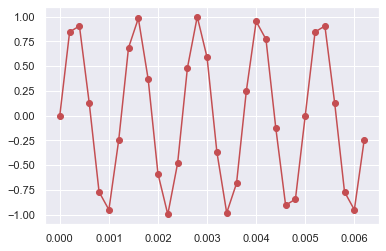

In [3]:
fsamp = 5000 #Define a frequency to SAMPLE the signal at.
Tsamp = 1/fsamp #Calculate the time step between SAMPLES.
Nsamp = 32 #Define how many SAMPLE values to make (power of 2).
#Create array 'tsamp' that contains all the SAMPLE times
tsamp = []
for i in range(0,Nsamp):
    tsamp.append(i*Tsamp)
#Create array 'ysamp' that contains all SIGNAL values at the SAMPLE times
ysamp = []
for i in range(0,Nsamp):
     ysamp.append(np.sin(2*np.pi*fsig*tsamp[i])) #Calculate the SIGNAL value at the
#SAMPLE times
plt.plot(tsamp,ysamp,'or') #Plot the SAMPLE values using red circles
plt.plot(tsamp,ysamp,'r-') #and red lines

In [4]:
print("The number of samples per period is: "+str(Tsig/Tsamp))

The number of samples per period is: 6.25


| Period | Number of Samples   |
|------|------|
|   0  | 7 |
|   1  | 6 |
|   2  | 6 |
|   3  | 6 |
|   4  | 6 |

Which yields a mean value of $6.25$ as we previously had for our simple one-liner of code. If we wanted the median or mode, they would both be $6$.

## Task 3
We are asked to proceed in the following manner. Compute the Fourier transform. Verify that the transform is complex and that it contains Nsamp elements. Compute the Fourier Power Spectrum. Verify that the Fourier power spectrum is real. Plot the power spectrum. Then shift the spectrum such that it is symmetric about the y-axis i.e. we have peaks, one at (x,y) and the other at (-x,y). Then verify that the second peak occurs at minus the value of the signal frequency.

I shall simply just do each of these tasks in turn as they are specified.

In [5]:
#Computing Fourier transform
from numpy.fft import fft
Y_FT = fft(ysamp) # Calculate the Fourier Transform of the SAMPLED signal
print(Y_FT)

[-0.09577143 +0.j         -0.08512669 -0.15006851j
 -0.04741755 -0.33753767j  0.04474643 -0.64319844j
  0.32575358 -1.41303112j  5.45305338-14.41441241j
 -1.08941451 +2.06485952j -0.67807464 +0.98520965j
 -0.55581211 +0.63877648j -0.49881617 +0.45928171j
 -0.46684449 +0.34427437j -0.44711137 +0.26075759j
 -0.4343297  +0.19471994j -0.42595671 +0.13907518j
 -0.42065896 +0.08973203j -0.41771781 +0.04402857j
 -0.41677393 +0.j         -0.41771781 -0.04402857j
 -0.42065896 -0.08973203j -0.42595671 -0.13907518j
 -0.4343297  -0.19471994j -0.44711137 -0.26075759j
 -0.46684449 -0.34427437j -0.49881617 -0.45928171j
 -0.55581211 -0.63877648j -0.67807464 -0.98520965j
 -1.08941451 -2.06485952j  5.45305338+14.41441241j
  0.32575358 +1.41303112j  0.04474643 +0.64319844j
 -0.04741755 +0.33753767j -0.08512669 +0.15006851j]


In [6]:
#verifying the transform is a complex number
#(i)
print("Looking at an example value, namely the last one.")
print("The type of the datapoint is "+str(type(Y_FT[-1])))
print("The imaginary component of the complex number is "+str(np.imag(Y_FT[-1])))

Looking at an example value, namely the last one.
The type of the datapoint is <class 'numpy.complex128'>
The imaginary component of the complex number is 0.15006851167644153


I've shown that one of the points is a numpy complex number datatype and that it is definitely not a real number since the imaginary part is non-zero, though technically it would be a complex number either way. This suffices to show that all points are complex numbers and that real numbers will not suffice for the transform since they will all be of the same datatype i.e. numpy complex number datatype and at least one of them is not a real number, meaning the entire transform is not composed of real numbers.

In [7]:
#verify transform has Nsamp elements, needs no explanation
len(Y_FT)==Nsamp

True

In [8]:
#Compute power spectrum
Y_POW = Y_FT*np.conj(Y_FT) # Convert the transform into a power spectrum (real +ve)

In [9]:
#verify that the power spectrum is real
#(ii)
pd.DataFrame(np.imag(Y_POW)).count(axis='rows')

0    32
dtype: int64

The type of the power spectrum will be a numpy complex number array since it is obtained from the multiplication of two complex numbers. So, we need to verify that all the imaginary components of the complex numbers are zero as opposed to looking at the datatype. To do this, I simply make use of Pandas' count function which return the frequencies of each value. We find we have 32 zeroes and no other values for the imaginary components of the power spectrum, which means that all of the numbers are real.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

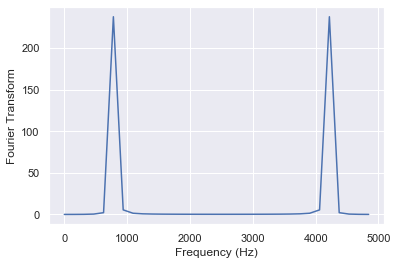

In [10]:
fstep = fsamp/Nsamp #Calculate the frequency step in the transform
#Create an array containing all the frequencies at which
f = []
for i in range(0,Nsamp):
     f.append(i*fstep)
#the transform has been calculated.
plt.plot(f,Y_POW)
plt.xlabel('f')
plt.ylabel('Y_POW')


plt.xlabel('Frequency (Hz)')
plt.ylabel('Fourier Transform')
plt.grid

In [11]:
Y_POW = np.fft.fftshift(Y_POW)
f2 = []
for i in f:
     f2.append(i - (fsamp/2))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\transforms.py:923: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval


Text(0, 0.5, 'Y_POW')

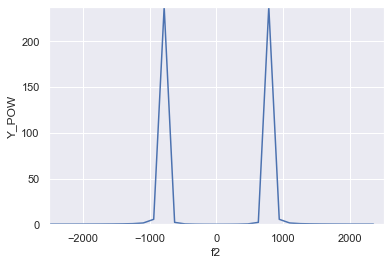

In [12]:
plt.plot(f2,Y_POW)
plt.ylim([0, max(Y_POW)])
plt.xlim([-fsamp/2, +fsamp/2])
plt.xlabel('f2')
plt.ylabel('Y_POW')

In [13]:
#verify the second peak occurs at minus the value of the signal frequency
import scipy.signal
peaks= scipy.signal.find_peaks(Y_POW)[0]
print(f2[peaks[0]])
print(f2[peaks[1]])

-781.25
781.25


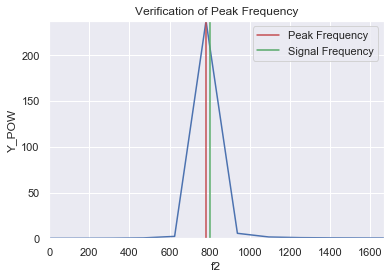

In [14]:
#checking I have indeed got my peaks with some simple code I'm reusing
plt.plot(f2,Y_POW)
plt.plot(np.ones(100)*f2[peaks[1]], np.linspace(0, 300, 100), 'r-', label="Peak Frequency")
plt.plot(np.ones(100)*800, np.linspace(0, 300, 100), 'g-', label="Signal Frequency")
plt.ylim([0, max(Y_POW)])
plt.xlim([0, +fsamp/3])
plt.xlabel('f2')
plt.ylabel('Y_POW')
plt.title("Verification of Peak Frequency")
plt.legend()

So we see that I am indeed correctly capturing the frequency at which the peak occurs i.e. $f_{peak}\approx781.25$Hz. The signal frequency we used was $f_{sig}=800$Hz. These are very similar and we can state that $f_{peak} \approx f_{sig}$ and thus that the second peak is approximately equal to the signal frequency multiplied by minus one as we were asked to do.

## Task 4
Investigate how the position and full width at half maximum (FWHM) of the Fourier peak change as a
function of the number of sample values. Set the number of samples to have the values 32, 128, and 256 in turn. Make
a comment about this.

To do this, I shall:
- Define a new function called Fourier_Transform so that I can easily changing the numbrt of samples.
- Plot the Fourier power series for each of the given number of samples for the same signal as before.
- Print the FWHM, and peak frequencies for each of those number of samples.
- Comment.

In [15]:
import scipy.fftpack

#function detailed in markdown
def Fourier_Transform(N, func, f_sig=800, f_samp=5000):
    """Given a sampling frequency, a signal function, a signal frequency and a number of samples, 
    this function returns the Fourier power series x and y co-ordinates"""
    YPOW=[]
    Y_POW_NEW=[]
    y_samp=[]
    
    T_samp = 1/f_samp
    t_samp = []
    for i in range(0,N):
        t_samp.append(i*T_samp)
    
    y_samp = []
    for i in range(0,N):
         y_samp.append(func(t_samp[i], f_sig)) #Calculate the SIGNAL value at the sample ts
    
    f_step = f_samp/N #Calculate the frequency step in the transform
    
    #Create an array containing all the frequencies at which
    fs = []
    for i in range(0,N):
         fs.append(i*f_step)
            
    YFT = fft(y_samp)
    YPOW = YFT*np.conj(YFT)
            
    #Y_POW_NEW = np.fft.fftshift(Y_POW)
    Y_POW_NEW = scipy.fftpack.fftshift(YPOW) #same thing as commented line above
    f_2 = []
    for i in fs:
         f_2.append(i - (f_samp/2))
    
    return f_2, Y_POW_NEW

In [16]:
#signal function
def f1(t, f_sig):
    return np.sin(2*np.pi*f_sig*t)

NUMBER OF SAMPLES: 32
Peak_1 Freq: -781.25
Peak_2 Freq: 781.25
FWHMs: [158.66666634 158.66484381]
 
NUMBER OF SAMPLES: 128
Peak_1 Freq: -781.25
Peak_2 Freq: 781.25
FWHMs: [78.52860823 78.52860823]
 
NUMBER OF SAMPLES: 256
Peak_1 Freq: -800.78125
Peak_2 Freq: 800.78125
FWHMs: [19.56266855 19.56266855]
 


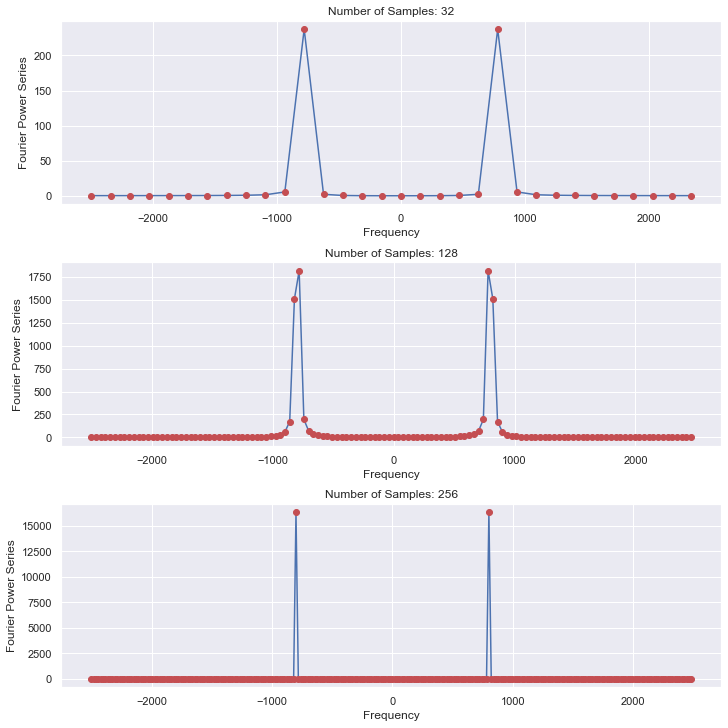

In [17]:
plt.rcParams['figure.constrained_layout.use'] = True #formatting
fig, axes=plt.subplots(3, figsize=(10, 10)) #normal initialisation

Ns=[32, 128, 256] #sample numbers list

for i in range(len(Ns)): #for each sample number
    x,y=Fourier_Transform(Ns[i], f1) #find my x,y to plot
    axes[i].plot(x,y, 'b-') #plot it with a continuous line
    axes[i].plot(x,y, 'ro') #plot with dots
    axes[i].set_title("Number of Samples: "+ str(Ns[i])) #title
    axes[i].set_xlabel("Frequency") #labelling
    axes[i].set_ylabel("Fourier Power Series") #labelling
    peaks=scipy.signal.find_peaks(y)[0] #find peaks
    dx=x[1]-x[0] #distance between two x points i.e. scaling factor
    print("NUMBER OF SAMPLES: "+str(Ns[i])) #print number of samples
    print("Peak_1 Freq: " + str(x[peaks[0]])) #find and print peak freq
    print("Peak_2 Freq: " + str(x[peaks[1]])) #find and print peak freq
    
    print("FWHMs: "+str(scipy.signal.peak_widths(y, peaks, rel_height=0.5)[0]*dx)) #find and print FWHM for each peak
    print(" ") #formatting

We have obtained the following data:

| Number of Samples | Peak Frequency | FWHM |
|------|------|------|
| 32 | 781.25 | 158.66666634 |
| 128 | 781.25 | 78.52860823 |
| 256 | 800.78125 | 19.56266855 |

We see firstly that increasing the number of samples makes the peak frequency become even closer to the signal frequency i.e. $$\lim\limits_{N \to \infty} f_{peak}=f_{sig}$$, which we expected to occur since increasing the sampling rate effectively just gives us back our signal.

The FWHM is more complex and I will plot it quickly below and then comment.

Text(0.5, 1.0, 'FWHM vs Number of Samples')

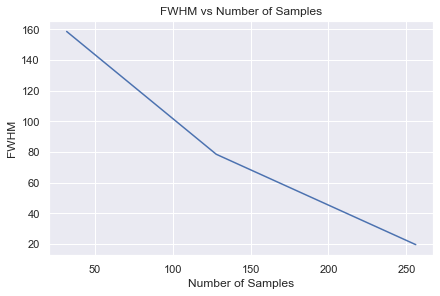

In [18]:
#simple plot
plt.plot(Ns, [158.66666634, 78.52860823, 19.56266855])
plt.xlabel('Number of Samples')
plt.ylabel('FWHM')
plt.title("FWHM vs Number of Samples")

We only have 3 datapoints so it will be difficult to make accurate predictions or analyses unless we gather more data. We can clearly see that increasing the number of samples decreases the FWHM since the peak becomes more and more narrow, eventually approaching a Dirac delta function. From our three data points, the rate at which the FWHM decreases looks like it may be some sort of exponential decay.

## Task 5
The Nyquist Rate is defined as twice the highest frequency present in a signal. (In our simple signal there is only one frequency present.) Here we will investigate what happens when the sampling frequency is not high enough, in particular when it drops below the Nyquist Rate. It results in a phenomenon called aliasing.

- (i) Set Fsig = 800 Hz and Nsamp = 256. What is the value of the Nyquist Rate?
- (ii) Look at the Fourier transforms as you reduce the sampling frequency from 2000 Hz to 1000 Hz in steps of 200 Hz. In a table record the frequency at which the Fourier peak occurs for each sample frequency.
- (iii)Describe what is happening.
- (iv) Find a simple formula which determines the location of the Fourier peak when the sampling frequency is less than the Nyquist Rate.
- (v) From your observations can you now give a simple description of what is meant by aliasing?

I shall simply execute parts (i) to (v).

Nyquist Rate: 1601.5625 Hz


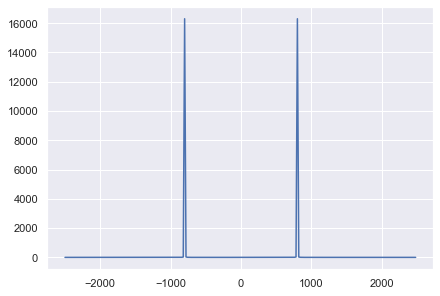

In [19]:
#(i)
#get a graph to plot just for simple visualisation.
#not presenting this, so not labelling either
x,y=Fourier_Transform(256, f1, 800)
plt.plot(x,y)

#get peaks
peaks=scipy.signal.find_peaks(y)[0]
#get and print Nyquist rate
print("Nyquist Rate: "+str(2*x[peaks[-1]])+" Hz")

The Nyquist Rate is then 1601.5625 Hz from our data, which is quite close to the expected value of 1600 Hz.


I will use 1600 Hz as the value though.

SAMPLE FREQ: 2000
Peak_1 Freq: -796.875
Peak_2 Freq: 796.875
MAX FREQ: 796.875
FWHMs: [11.50643067 11.50639508]
 
SAMPLE FREQ: 1800
Peak_1 Freq: -801.5625
Peak_2 Freq: 801.5625
MAX FREQ: 801.5625
FWHMs: [7.46999294 7.46994727]
 
SAMPLE FREQ: 1600
Peak_1 Freq: -775.0
Peak_2 Freq: -743.75
MAX FREQ: -25.0
FWHMs: [ 4.72236898  7.39983015  7.65137616  6.79323001  4.26761613 15.17892334
  5.25321545 12.44350101 12.30065459  7.83854901 11.2363735   9.65319016
  3.74227296  5.9777643   3.94810104 18.08220419  8.19650557 11.75918167
  6.17468395  6.16162416  8.94740753  6.08734086 10.9039776   9.49296841
  4.67828847 11.12528234  6.31171297  6.32950433  3.66264127  4.58442668
 19.46004792 10.67217926  6.22749322 10.26122584  7.43651655  3.64147187
 26.43511529 26.43511529  3.64147187  7.43651655 10.26122584  6.22749322
 10.67217926 19.46004792  4.58442668  3.66264127  6.32950433  6.31171297
 11.12528234  4.67828847  9.49296841 10.9039776   6.08734086  8.94740753
  6.16162416  6.17468395 11.7591

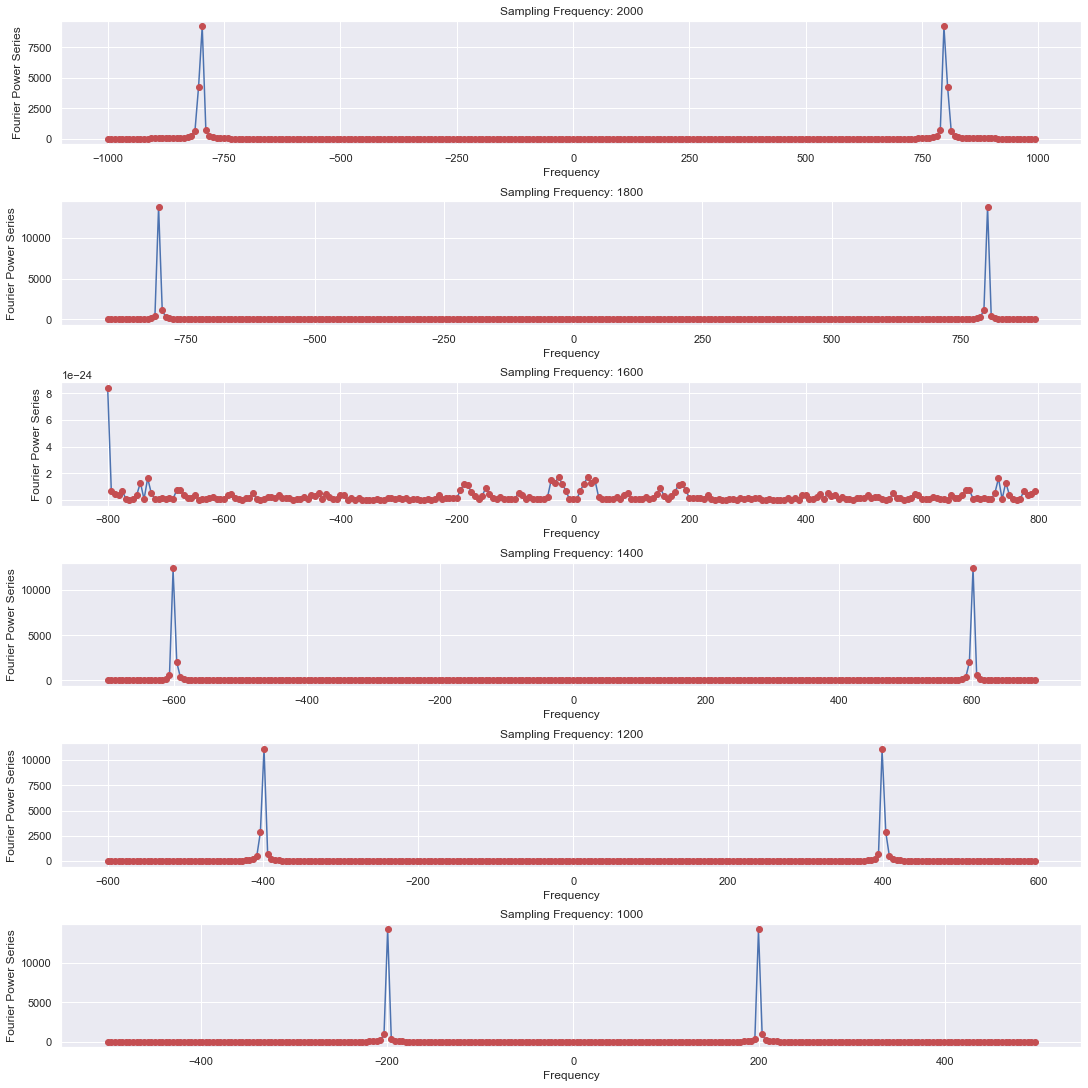

In [20]:
#(ii)

#initialising my table to record frequencies of Fourier peaks
nyquist_data=pd.DataFrame(columns=['Peak Freq', 'Sample Freq'])

f_samps=list(range(1000, 2200, 200))[::-1] #make list of sample frequencies

#initialise plot
fig, axes=plt.subplots(len(f_samps), figsize=(15, 15))

#initiliase some arrays
peak_freq=[]
sample_freq=[]

for i in range(len(f_samps)): #for each sample rate
    x,y=Fourier_Transform(256, f1, f_samp=f_samps[i]) #find Fourier power series
    #plot
    axes[i].plot(x,y, 'b-')
    axes[i].plot(x,y, 'ro')

    axes[i].set_title("Sampling Frequency: "+str(f_samps[i])) #label title
    axes[i].set_xlabel("Frequency") #labelling
    axes[i].set_ylabel("Fourier Power Series") #labelling
    
    peaks=scipy.signal.find_peaks(y)[0] #find peaks
    dx=x[1]-x[0] #find difference between two points
    
    #some text about the plots
    print("SAMPLE FREQ: "+ str(f_samps[i]))
    print("Peak_1 Freq: " + str(x[peaks[0]])) #find and print peak freq
    print("Peak_2 Freq: " + str(x[peaks[1]])) #find and print peak freq
    max_freq=x[peaks[np.argmax(list(map(lambda x: abs(y[x]), peaks)))]] #find max peak freq
    print("MAX FREQ: "+str(max_freq)) #print max freq
    print("FWHMs: "+ str(scipy.signal.peak_widths(y, peaks, rel_height=0.5)[0]*dx)) #print FWHMs
    print(" ") #formatting
    
    sample_freq.append(f_samps[i]) #append freq to freq array
    peak_freq.append(max_freq) #append max freq to peak freq array

#put arrays into DataFrame
nyquist_data['Peak Freq']=peak_freq
nyquist_data['Sample Freq']=sample_freq

In [21]:
nyquist_data['Peak Freq ABS']=abs(nyquist_data["Peak Freq"]) #make sure positive
nyquist_data #show DataFrame

,Peak Freq,Sample Freq,Peak Freq ABS
0,796.87500,2000,796.87500
1,801.56250,1800,801.56250
2,-25.00000,1600,25.00000
3,-601.56250,1400,601.56250
4,-398.43750,1200,398.43750
5,-199.21875,1000,199.21875


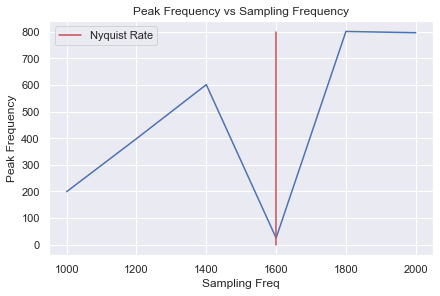

In [22]:
#simple plot
plt.plot(nyquist_data['Sample Freq'], nyquist_data['Peak Freq ABS'])
plt.plot(np.ones(100)*1600, np.linspace(0, 800, 100), 'r-', label="Nyquist Rate")
plt.xlabel('Sampling Freq')
plt.ylabel('Peak Frequency')
plt.title("Peak Frequency vs Sampling Frequency")
plt.legend()

(iii)
We see two distinct behaviours for the relation between the peak frequency and the sampling frequency. 

If the sampling frequency is above the Nyquist rate, it approximates the signal frequency as intended. 

At the Nyquist rate, we obtain a large number of small peaks and we could see from our graphs that the output was very noisy and not at all like a single frequency signal that it should have been i.e. using a sampling frequency at the Nyquist rate gives a super inaccurate reading.

Most interesting is below the Nyquist rate. Here we get peak frequencies that are far less than the signal frequencies. In fact, we even get a well defined pattern here, it is a linear decrease. In fact, we see that the slope is one since every increase in 200 Hz for the sampling frequency corresponds to a increase in 200Hz for the peak frequency (roughly). 

(iv)
Thus, we would have that approximately $$f_{peak} = f_{sampling} - 800$$
when we are below the Nyquist rate.

(v)
We are told we have aliasing below the Nyquist rate, and to explain this now. Aliasing is simply the phenomenon when the signal frequency (peak frequency) we obtain is lower than the actual signal frequency i.e. our sampling rate is too low so we cannot pick up the higher frequency that is the actual value of the signal frequency. Our finding are thus unsurprising.

## Task 6
Set Fsig = 800 Hz and Nsamp = 256 again. Set the sampling frequency to be 5000 Hz and add the
following line immediately below where you calculate the sampled signal in task 2.

$ysamp.append((np.sin(2*np.pi*fsig*tsamp[i])) + np.random.normal(1,Nsamp))$

This uses Nsamp random numbers drawn from a uniform normal distribution (i.e. mean of zero,
standard deviation of one). We use these to simulate noise in the signal.

There's only one thing to do here, and it's done below.

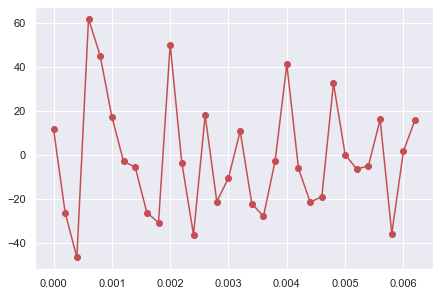

In [23]:
#task two code
fsamp = 5000 #Define a frequency to SAMPLE the signal at.
Tsamp = 1/fsamp #Calculate the time step between SAMPLES.
Nsamp = 32 #Define how many SAMPLE values to make (power of 2).
#Create array 'tsamp' that contains all the SAMPLE times
tsamp = []
for i in range(0,Nsamp):
    tsamp.append(i*Tsamp)
#Create array 'ysamp' that contains all SIGNAL values at the SAMPLE times
ysamp = []
for i in range(0,Nsamp):
     ysamp.append((np.sin(2*np.pi*fsig*tsamp[i])) + np.random.normal(1,Nsamp)) #ADDED NOISE
#SAMPLE times
plt.plot(tsamp,ysamp,'or') #Plot the SAMPLE values using red circles
plt.plot(tsamp,ysamp,'r-') #and red lines


## Task 7
This is a powerful technique by which we can remove noise from the signal.

- (i) Use the ifft function to get the Inverse Fourier Transform of Y(f). Plot this and Verify that the inverse transform is the same as the original sampled noisy signal.
- (ii) Now for the filtering – set components of the Fourier transform to zero if the Fourier power is less than some suitable threshold. Plot the inverse transform of the filtered transform.
- (iii) Comment on whether the noise was successfully removed

I'll execute parts (i)-(iii) in order.

In [24]:
#noisy signal
def f_noisy(t, f_sig, N):
    return np.sin(2*np.pi*f_sig*t) + np.random.normal(1,N)

#modifying the old Fourier Transform function since we need to 
#return just the original signal and the Fourier Transform of it
#As such, won't do any comments etc since I'm reusing code
def FT_Task7(N, func, f_sig=800, f_samp=5000):
    """Given a sampling number, function, signal frequency and sampling frequency, 
    this returns the sampled signal and the Fourier transform, both as two arrays of xy co-ordinates"""
    YPOW=[]
    Y_POW_NEW=[]
    y_samp=[]
    
    T_samp = 1/f_samp
    t_samp = []
    for i in range(0,N):
        t_samp.append(i*T_samp)
    
    y_samp = []
    for i in range(0,N):
         y_samp.append(func(t_samp[i], f_sig, N)) #Calculate the SIGNAL value at the
    
    f_step = f_samp/N #Calculate the frequency step in the transform
    
    #Create an array containing all the frequencies at which
    fs = []
    for i in range(0,N):
         fs.append(i*f_step)
            
    YFT = fft(y_samp)
#     YPOW = YFT*np.conj(YFT)
            
#     #Y_POW_NEW = np.fft.fftshift(Y_POW)
#     Y_POW_NEW = scipy.fftpack.fftshift(YPOW)
#     f_2 = []
#     for i in fs:
#          f_2.append(i - (f_samp/2))
    
    return [[fs, YFT], [t_samp, y_samp]]

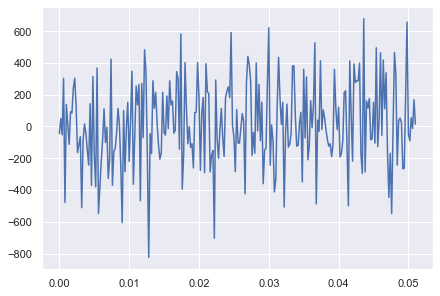

In [25]:
#(i)
#Just want to see what my noisy signal looks like
#Not labelling since not presenting this
a,b=FT_Task7(256, f_noisy, f_sig=800, f_samp=5000) #get my arrays
x,y=b #get sampled signal
f, FT = a #get Fourier Transform of sampled signal
plt.plot(x,y) #plot sampled signal

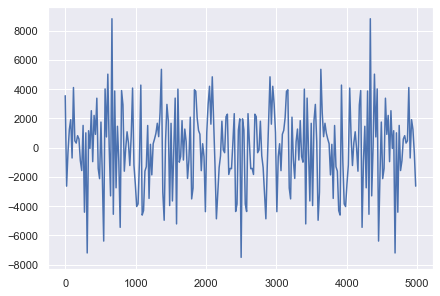

In [26]:
plt.plot(f, FT) #plot Fourier Transform of sampled signal

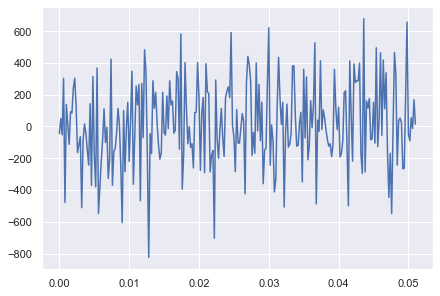

In [27]:
#checking ifft does what it is supposed to
y_orig=np.real(np.fft.ifft(FT)) #ifft of fft should just return signal
plt.plot(x, y_orig) #plot signal

Text(0.5, 1.0, 'Proving ifft(fft(x))=x')

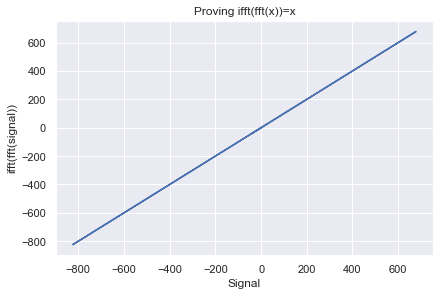

In [28]:
#making sure that they are indeed the same with a graph
plt.plot(y_orig, y)
plt.xlabel('Signal')
plt.ylabel('ifft(fft(signal))')
plt.title("Proving ifft(fft(x))=x")

 We see this graph is $y=x$, thus $\operatorname{ifft}\left(\operatorname{fft}\left({signal}\right)\right)$ is just the signal as we wanted. This verifies (i).

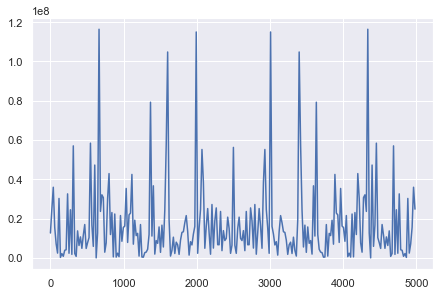

In [29]:
#(ii)

#making a dataframe to store my values
FT_df=pd.DataFrame()
FT_df['signal']=y #signal
FT_df['FT']=FT #transform of signal
FT_df['FT_POW']=np.real(FT*np.conj(FT)) #fourier power series of signal
plt.plot(f, FT_df['FT_POW']) #simple plot to show noise level

Text(0.5, 0, 't')

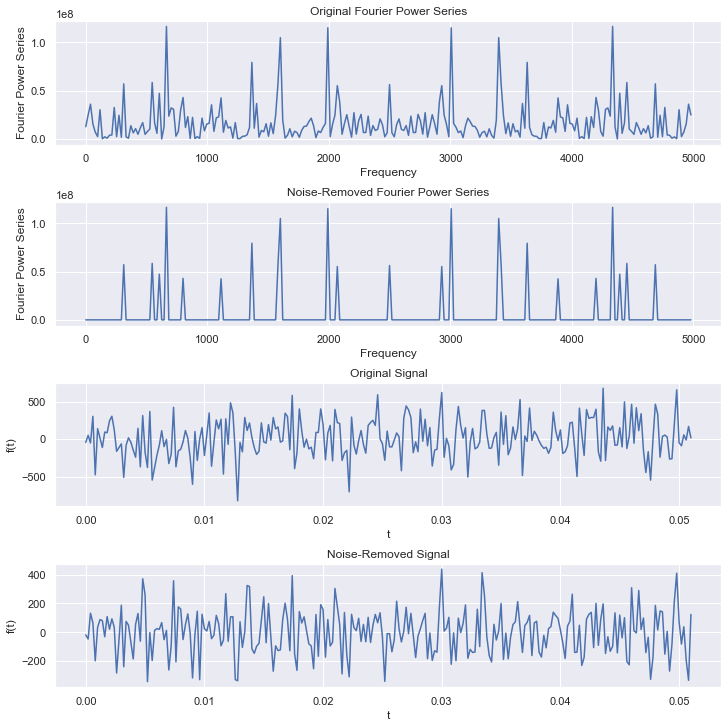

In [30]:
#From the basic graph above, I will choose a cut-off of 0.4*10**8 as a starting point

fig, ax=plt.subplots(4, figsize=(10, 10)) #initialise plot

#plot original Fourier Power series
ax[0].plot(f, FT_df['FT_POW'])
ax[0].set_title("Original Fourier Power Series") #title
ax[0].set_xlabel("Frequency") #labelling
ax[0].set_ylabel("Fourier Power Series") #labelling


#remove noise
FT_df[FT_df['FT_POW']<0.4*10**8]=0

#plot power series now with removed noise
ax[1].plot(f, FT_df['FT_POW'])
ax[1].set_title("Noise-Removed Fourier Power Series") #title
ax[1].set_xlabel("Frequency") #labelling
ax[1].set_ylabel("Fourier Power Series") #labelling

#plot original signal
ax[2].plot(x,y)
ax[2].set_title("Original Signal") #title
ax[2].set_ylabel("f(t)") #labelling
ax[2].set_xlabel("t") #labelling

#plot noise-removed signal
FT_df['noiseremoved_y']=np.fft.ifft(FT_df['FT'])
ax[3].plot(x, FT_df['noiseremoved_y'])
ax[3].set_title("Noise-Removed Signal") #title
ax[3].set_ylabel("f(t)") #labelling
ax[3].set_xlabel("t") #labelling

Text(0.5, 0, 't')

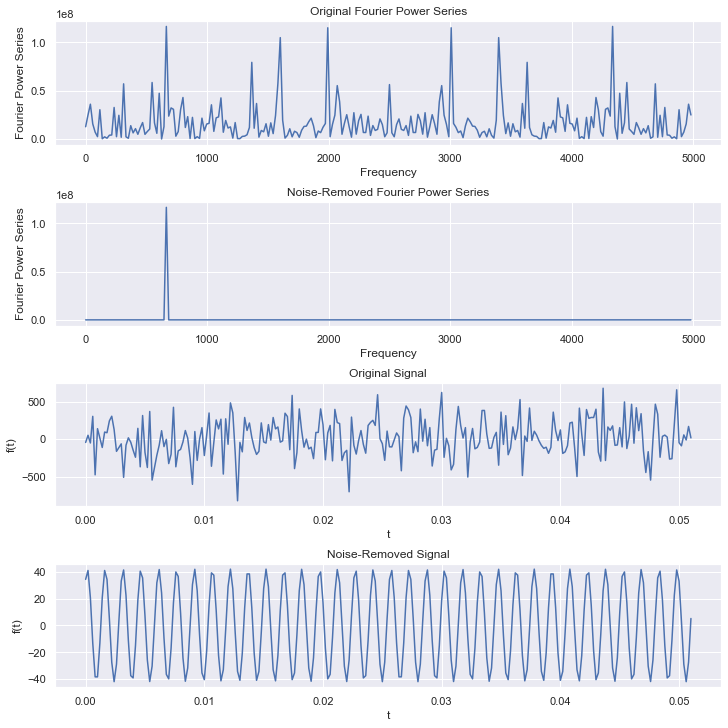

In [31]:
#We see from the plot above we need to remove more noise
#As such, I will choose a cut-off to be the max value since we know the signal has only one frequency
#I will also remove frequencies above 3000 Hz since we know our signal does not have a frequency that high

#get data again
FT_df=pd.DataFrame()
FT_df['signal']=y
FT_df['FT']=FT
FT_df['FT_POW']=np.real(FT*np.conj(FT))
FT_df['freq']=f

fig, ax=plt.subplots(4, figsize=(10, 10)) #initialise plot

#plot original Fourier Power series
ax[0].plot(f, FT_df['FT_POW'])
ax[0].set_title("Original Fourier Power Series") #title
ax[0].set_xlabel("Frequency") #labelling
ax[0].set_ylabel("Fourier Power Series") #labelling


#remove noise
FT_df[FT_df['FT_POW']<=np.max(FT_df['FT_POW'])-1]=0
FT_df[FT_df['freq']>3000]=0

#plot power series now with removed noise
ax[1].plot(f, FT_df['FT_POW'])
ax[1].set_title("Noise-Removed Fourier Power Series") #title
ax[1].set_xlabel("Frequency") #labelling
ax[1].set_ylabel("Fourier Power Series") #labelling

#plot original signal
ax[2].plot(x,y)
ax[2].set_title("Original Signal") #title
ax[2].set_ylabel("f(t)") #labelling
ax[2].set_xlabel("t") #labelling

#plot noise-removed signal
FT_df['noiseremoved_y']=np.fft.ifft(FT_df['FT'])
ax[3].plot(x, FT_df['noiseremoved_y'])
ax[3].set_title("Noise-Removed Signal") #title
ax[3].set_ylabel("f(t)") #labelling
ax[3].set_xlabel("t") #labelling

(iii)

We had an extremely noisy signal, but we can see from the above graph that the noise has most definitely been reduced. To do this, I had not only to cut out frequencies with lower Fourier powers, but I also had to remove higher frequencies in order to ensure we are left with a single frequency. The noise will never be fully removed just from the nature of the process, but I would say we could consider it successfully removed for our purposes here. We do end up obtaining a signal with a frequency in the region of $800$ Hz as we would expect.

## Task 8
Now modify your programme so that you define two signal frequencies, $f_1 = 800$ Hz and
$f_2 = 1200$ Hz. Change the definition of the signal, both in section (a) where you plot it and section (b)
where you sample it, to be as follows:
$$\operatorname{y}\left(t\right) = \operatorname{sin}\left(2 \pi f_1 t \right) + \frac{1}{2} \operatorname{sin} \left(2 \pi f_2 t \right)$$


Use Nsamp = 256 and Fsamp = 5000 and do not add noise.
- (i) Verify that you get two peaks in the power spectrum at the correct frequencies.
- (ii) Reduce f2 and determine how close you can make it to f1 so that you can still see two distinct peaks in the power spectrum.
- (iii) Investigate the effect of the number of samples on your ability to distinguish the frequencies.
- (iv) Investigate the effect of different amounts of noise in the signal on your ability to distinguish the frequencies.

I shall execute (i) to (iv) in turn.

In [32]:
#(i)

#create that y(t) function in markdown
def two_freqs(t, f_sig):
    f_sig1=800
    f_sig2=1200
    return np.sin(2*np.pi*f_sig1*t) + 0.5*np.sin(2*np.pi*f_sig2*t)

#get transform
x,y = Fourier_Transform(256, two_freqs, f_sig=800, f_samp=5000)

Text(0.5, 1.0, 'Underlying Frequencies')

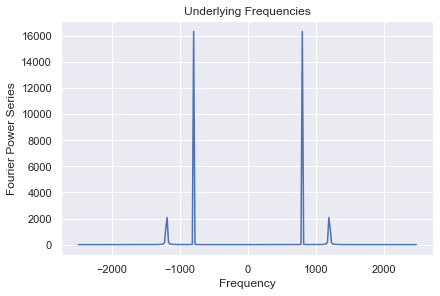

In [33]:
#plot in Fourier plane
plt.plot(x,y)
plt.xlabel("Frequency")
plt.ylabel('Fourier Power Series')
plt.title("Underlying Frequencies")

We see that we do indeed get two peaks in the power spectrum at $f_1$ and $f_2$ as expected.

Text(0.5, 1.0, 'Underlying Frequencies')

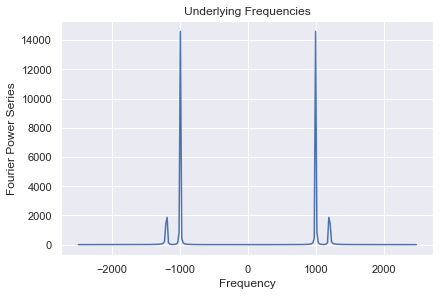

In [34]:
#(ii)

#y(t) function with closer f1 and f2
def two_freqs(t, f_sig):
    f_sig1=1000
    f_sig2=1200
    return np.sin(2*np.pi*f_sig1*t) + 0.5*np.sin(2*np.pi*f_sig2*t)

#get and plot transform
x,y = Fourier_Transform(256, two_freqs, f_sig=800, f_samp=5000)
plt.plot(x,y)
plt.xlabel("Frequency")
plt.ylabel('Fourier Power Series')
plt.title("Underlying Frequencies")

Text(0.5, 1.0, 'Underlying Frequencies')

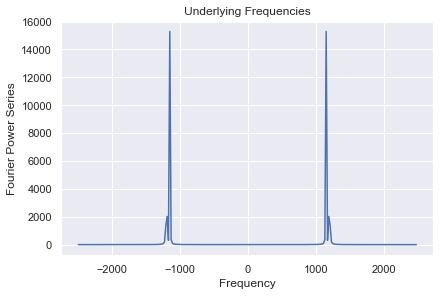

In [35]:
#even closer f1 and f2

def two_freqs(t, f_sig):
    f_sig1=1150
    f_sig2=1200
    return np.sin(2*np.pi*f_sig1*t) + 0.5*np.sin(2*np.pi*f_sig2*t)

x,y = Fourier_Transform(256, two_freqs, f_sig=800, f_samp=5000)
plt.plot(x,y)
plt.xlabel("Frequency")
plt.ylabel('Fourier Power Series')
plt.title("Underlying Frequencies")

This is the limit at which I can still discern the two peaks.

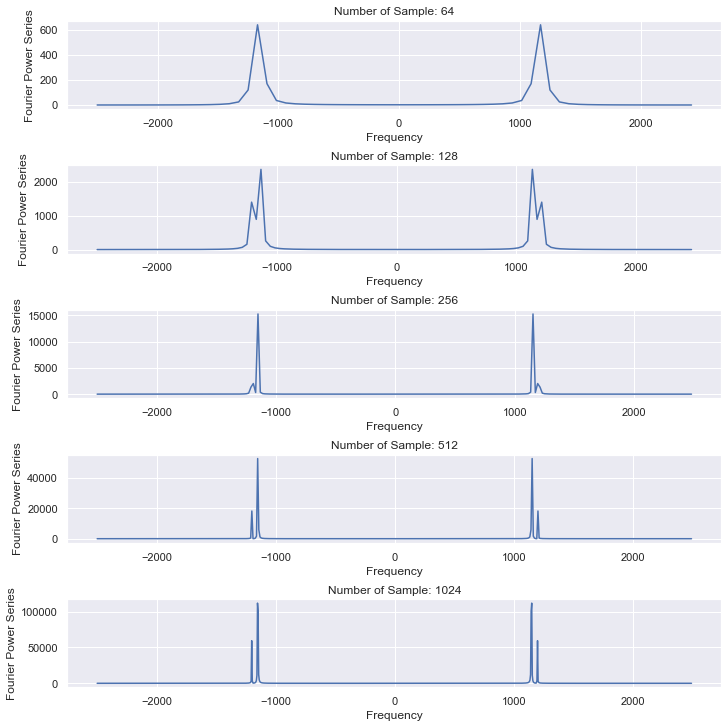

In [36]:
#(iii)

samps=[64, 128, 256, 512, 1024] #array of sample numbers
fig, ax=plt.subplots(len(samps), figsize=(10,10)) #set up plots
for i in range(len(samps)):
    x,y = Fourier_Transform(samps[i], two_freqs, f_sig=800, f_samp=5000) #find arrays to plot
    ax[i].plot(x,y) #plot
    ax[i].set_title("Number of Sample: "+str(samps[i])) #labelling
    ax[i].set_xlabel("Frequency") #labelling
    ax[i].set_ylabel("Fourier Power Series") #labelling

Increasing sample rate gives sharper peaks and thus better allows us to distinguish. This makes sense since the more samples we have, the more data we have to reconstruct our signal and thus the more accurate and sharp our peaks in the Fourier plane will be.

Text(0.5, 1.0, 'Underlying Frequencies')

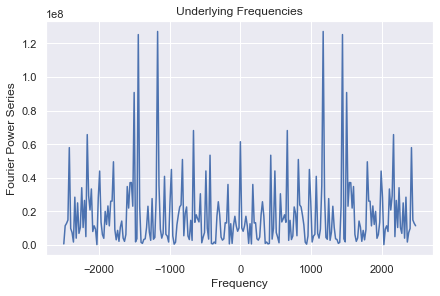

In [37]:
#(iv)

#same function but now with a lot of noise (using 256 in my np.random.normal)
def two_freqs(t, f_sig):
    f_sig1=1150
    f_sig2=1200
    return np.sin(2*np.pi*f_sig1*t) + 0.5*np.sin(2*np.pi*f_sig2*t) + np.random.normal(1,256)

x,y = Fourier_Transform(256, two_freqs, f_sig=800, f_samp=5000) #get arrays
plt.plot(x,y) #plot
#labelling
plt.xlabel("Frequency")
plt.ylabel('Fourier Power Series')
plt.title("Underlying Frequencies")

I cannot distinguish the peaks in the slightest here, so I shall decrease the noise until I can. Then I shall comment.

Text(0.5, 1.0, 'Underlying Frequencies')

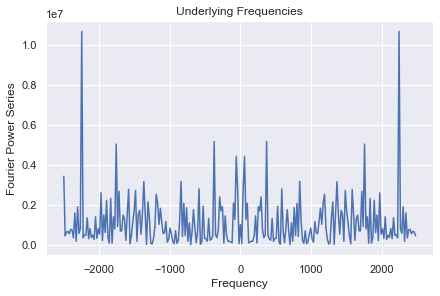

In [38]:
#less noise
def two_freqs(t, f_sig):
    f_sig1=1150
    f_sig2=1200
    return np.sin(2*np.pi*f_sig1*t) + 0.5*np.sin(2*np.pi*f_sig2*t) + np.random.normal(1,64)

x,y = Fourier_Transform(256, two_freqs, f_sig=800, f_samp=5000) #get arrays
plt.plot(x,y) #plot
#labelling
plt.xlabel("Frequency")
plt.ylabel('Fourier Power Series')
plt.title("Underlying Frequencies")

Text(0.5, 1.0, 'Underlying Frequencies')

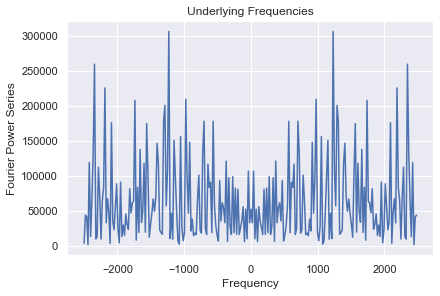

In [39]:
#even less
def two_freqs(t, f_sig):
    f_sig1=1150
    f_sig2=1200
    return np.sin(2*np.pi*f_sig1*t) + 0.5*np.sin(2*np.pi*f_sig2*t) + np.random.normal(1,16)

x,y = Fourier_Transform(256, two_freqs, f_sig=800, f_samp=5000) #get arrays
plt.plot(x,y) #plot
#labelling
plt.xlabel("Frequency")
plt.ylabel('Fourier Power Series')
plt.title("Underlying Frequencies")

Text(0.5, 1.0, 'Underlying Frequencies')

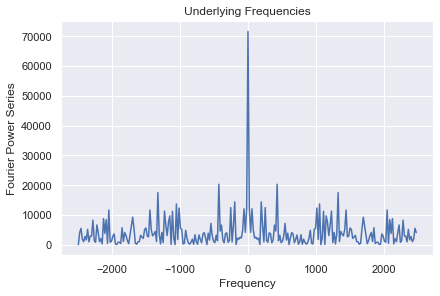

In [40]:
#still less
def two_freqs(t, f_sig):
    f_sig1=1150
    f_sig2=1200
    return np.sin(2*np.pi*f_sig1*t) + 0.5*np.sin(2*np.pi*f_sig2*t) + np.random.normal(1,4)

x,y = Fourier_Transform(256, two_freqs, f_sig=800, f_samp=5000) #get arrays
plt.plot(x,y) #plot
#labelling
plt.xlabel("Frequency")
plt.ylabel('Fourier Power Series')
plt.title("Underlying Frequencies")

Text(0.5, 1.0, 'Underlying Frequencies')

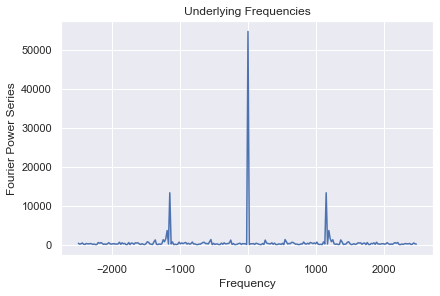

In [41]:
#les again
def two_freqs(t, f_sig):
    f_sig1=1150
    f_sig2=1200
    return np.sin(2*np.pi*f_sig1*t) + 0.5*np.sin(2*np.pi*f_sig2*t) + np.random.normal(1,1)

x,y = Fourier_Transform(256, two_freqs, f_sig=800, f_samp=5000) #get arrays
plt.plot(x,y) #plot
#labelling
plt.xlabel("Frequency")
plt.ylabel('Fourier Power Series')
plt.title("Underlying Frequencies")

I can now distinguish the peaks. We can very clearly see that noise plays an enormous role in our ability to distinguish underlying frequencies in a sample. The more noise, obviously the harder it gets.